# <div dir=rtl> TA 8 - Dimensionality Reduction + Intro to Unsupervised learning  </div>


------------

## <div dir=rtl>Dimensionality Reduction</div>

<div dir=rtl>
היום נדבר על Dimensionality reduction - העתקה של הדאטא שלי מהמימד המקורי הגבוה שלה (כמות הפיצ'רים) למימד נמוך יותר, בלי לאבד יותר מידי תכונות משמעותיות מהדאטא המקורי. 
</br>
פעמים רבות הדאטא שלנו יהיה ממימד גבוה מידי, ונתקשה לעבוד איתו - בין אם מבחינת יכולת חישוב, יכולת ויזואליזציה, overfitting, פיצ'רים מיותרים ועוד
</br>
במילים אחרות - נרצה "לסכם" את הדאטא שלנו ולשמור ממנו רק את מה שבאמת חשוב.
</br>
בהרצאה הכרנו שתי שיטות לכך - PCA וtSNE.
</div>

### <div dir=rtl> PCA </div>

<div dir=rtl>
PCA, או Principal Component analysis היא שיטה לינארית להורדת מימד בה אנחנו מבצעים איזושהי העתקה לינארית למערכת קורדינאטות חדשה בה כל ציר הוא (לרוב) אינו פיצ'ר מקורי של הדאטא, אלא מעין "פיצ'ר חדש" (Principal Component) שמסכם בצורה הכי טובה שניתן את השינויים המשמעותיים בדאטא.
</br>
הPCים השונים יבנו בצורה שתדאג שהטלה עליהם תשמר כמה שיותר variance בדאטא ו"תתעלם" מפיצ'רים פחות תורמים.
</div>

<div dir=rtl>
כפי שראינו (מתמטית) בהרצאה, בPCA אנחנו עונים של שתי מטרות "זהות": 
</br>
1. Maximizing the projected variance - מציאת הכיוון בו הדאטא כמה שיותר פרוס (Variance גבוה), כדי לשמור כמה שיותר אינפורמציה על הדאטא
</br>
2. Minimizing the projection residuals - חיפוש הPCים המקיימים שסכום ריבועי המרחקים (reconstruction error) בין הדאטא המקורי להטלות שלהם על הPCים הוא הקטן ביותר, כדי שנוכל במידת הצורך "להטיל" אותם חזרה למימד המקורית בפשטות.

![alt text](PCA_Goals.png)

</div>

<div dir=rtl>
הסבר יותר אינטואטיבי ללמה שתי מטרות אלו זהות הוא גיאומטרי - נסתכל על המשולש שנוצר ע"י הטלה של נקודה על הPC. נשים לב שבגלל משפט פיתגורס מזעור המרחק לPC זהה למקסום הspread (variance) וההפך.
</br>
באנימציה נוכל לראות איך שינוי של הPC יגדיל/יקטין את מרחק ההטלה ובהתאם לכך יקטין/יגדיל את הspread.
</br>
(Animation from - "https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues" Which is highly recommened reading for understanding and intuition!!)
</br>
</br>
</div>

<div style="display: flex; align-items: center;">
    <img src="PCA_Goals_relation.gif" alt="PCA Goals Animation" style="width: 45%; margin-right: 10px;">
    <img src="PCA_Goals_equivalence.png" alt="PCA Goals Equivalence" style="width: 45%;">
</div>

<div dir=rtl>
בפועל, אותם הPCים הם הוקטורים העצמיים של מטריצת הcovariance של הדאטא שלנו, המסודרים על פי גודל הערך העצמי.
</br>
כך, אנחנו מקבלים שהPC הראשון שלנו תואם לכיוון הvariance המקסימלי בדאטא שלנו, הPC השני (שאורתוגונלי לראשון - למה?) תופס את הvariance הגדול ביותר הבא וכו וכו

![alt text](PCA_PCs.png)

</div>

### <div dir=rtl> tSNE </div>

<div dir=rtl>
tSNE, או t-distributed Stochastic Neighbor Embedding היא שיטה *לא-לינארית* להורדת מימדים המשמשת לויזואליזציה של דאטא ממימד גבוה, למציאת קלאסטרים ומבנים לא לינאריים אחרים שהטלות פשוטות לא יכולות למצוא.
</br>
tSNE לוקחת נקודות ממימד גבוה מסוים ומעבירה אותן למימד נמוך יותר, תוך שמירה על שכנויות בין הנקודות (במימד המקורי) והפרדה משמעותית מספיק בין לא-שכנים.
</br>
זה נעשה באמצעות המרה של מרחקים בין כל זוג נקודות להסתברות - כאשר שכנים יחזירו הסתברות גבוהה, ונקודות רחוקות יחזירו הסתברות נמוכה.
</br>
לאחר מכן, tSNE מנסה לחפש את ההטלות למימד החדש שממזערות את KL divergence - סט ההטלות שהפיזור שלהן (ההתפלגויות) כמה שיותר קרוב להתפלגויות של הדאטא המקורי. 
</br>
כדי למנוע "Crowding" - מחשבים לפי t-distribution במימד הנמוך יותר.
</div>

<div dir=rtl>
בהרצאה ראיתם דוגמא עבור דאטאסט MNIST בו קיימות לנו ספרות שונות בכתב יד, שם כל פיצ'ר הוא פיקסל. מדובר בהמון פיקסלים, ועל כן נרצה לסכם את הדאטא שלנו איכשהו - תוך שמירה על השנויות בו. ,
במה נשתמש?
</br>
במקרה של MNIST, הדאטא לא פריד לינארית
</div>

In [1]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

Subset shape: (10000, 784), Labels shape: (10000,)


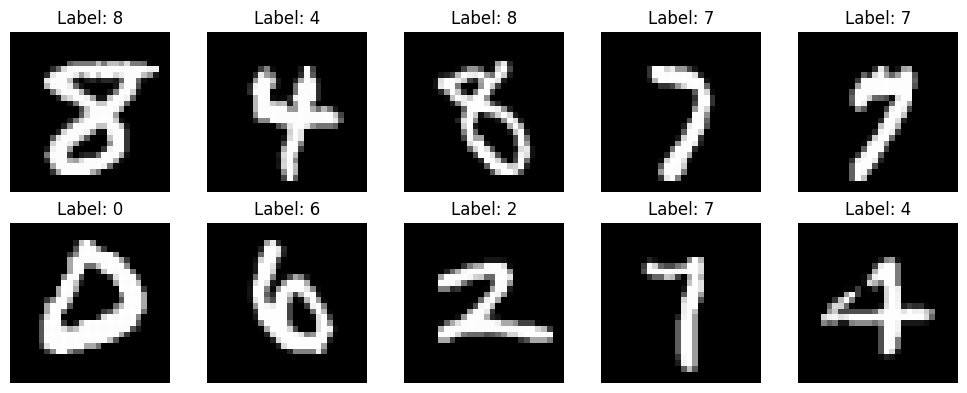

In [ ]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data / 255.0
y = mnist.target

# Select 10000 random points
np.random.seed(42)  # For reproducibility
indices = np.random.choice(range(X.shape[0]), size=10000, replace=False)
X_subset = X.iloc[indices]
y_subset = y.iloc[indices]

# print the shape of the subset
print(f"Subset shape: {X_subset.shape}, Labels shape: {y_subset.shape}")

# plot a few random images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_subset.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_subset.iloc[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()  

In [6]:
# Apply PCA for initial dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subset)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

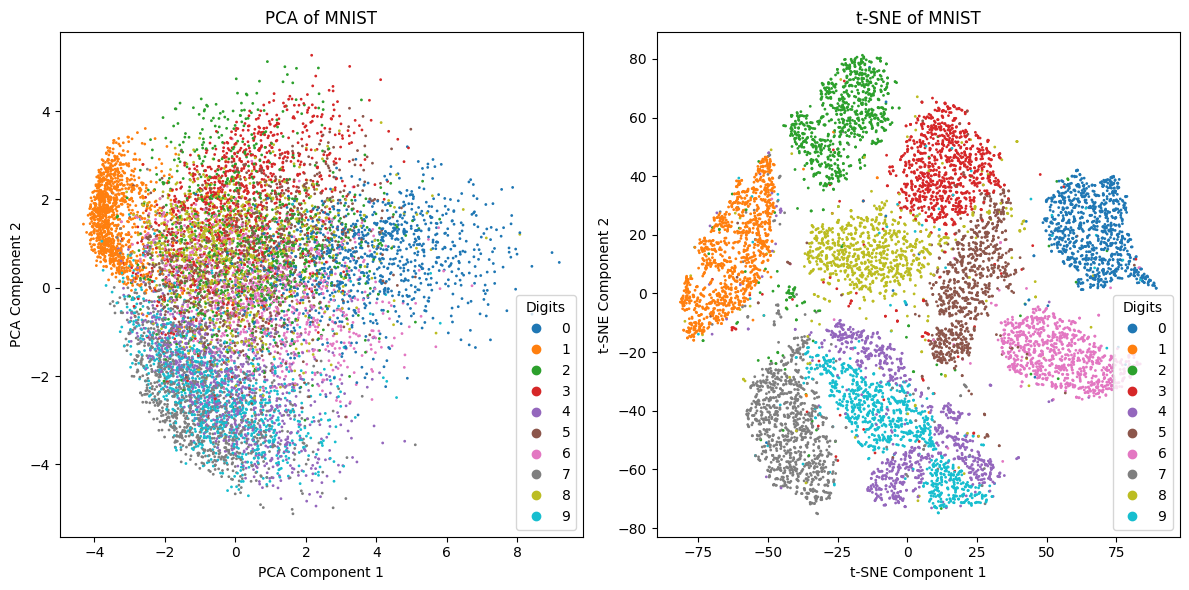

In [ ]:
# plot a figure with PCA and t-SNE results

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# PCA plot
scatter1 = ax[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_subset.astype(int), cmap='tab10', s=1)
ax[0].set_title('PCA of MNIST')
ax[0].set_xlabel('PCA Component 1')
ax[0].set_ylabel('PCA Component 2')
ax[0].legend(*scatter1.legend_elements(), title="Digits")

# t-SNE plot
scatter2 = ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset.astype(int), cmap='tab10', s=1)
ax[1].set_title('t-SNE of MNIST')
ax[1].set_xlabel('t-SNE Component 1')
ax[1].set_ylabel('t-SNE Component 2')
ax[1].legend(*scatter2.legend_elements(), title="Digits")


plt.tight_layout()
plt.show()

<div dir=rtl>
tSNE הצליח להבין את הדקויות הלא לינאריות בדאטא שלנו, ועל כן הצליח לבצע הטלות משמעותיות יותר
</div>

<div dir=rtl>
אבל רגע - בעצם הצלחנו לעשות פה עוד משהו, לא?
הצלחנו להפריד את הדאטא שלנו למחלקות שונות, כל אחת ב"קלאסטר" שונה!
</div>

## <div dir=rtl>Unsupervised learning</div>

<div dir=rtl>
עד כה דיברנו על צורת למידה (Supervised learning) בה אנחנו מקבלים דאטא מסוים, עם לייבלים (gt) ולפי זה ניסינו לבנות מודל שידע לחזות כמה שיותר טוב על סמך אותם הgtים.
</br>
עכשיו נדבר על צורת למידה אחרת - Unsupervised learning בה אנחנו מקבלים דאטא ללא הלייבלים שלו, וננסה לבצע "למידה" ע"י זיהוי תבניות או מבנים מסויימים בו.
</br>
כפי שכנראה ניחשתן - המשימות שלרוב למידה כזו תבצע הם הורדת מימד, קלאסטרינג וזיהוי תבניות או אנומליות.
</br>
אם תשימו לב - בקוד שביצענו מוקדם עבור PCA וtSNE - לא השתמשנו בלייבלים בשלב החישוב. על כן, את הקלאסטרינג ביצענו בלי לדעת מה החלוקה האמיתית.
</div>

-----------------

<div dir=rtl>
    בתרגול זה נראה דוגמה למימוש אלגוריתם קיבוץ על ידי חבילות בפייתון. 
    <br />
    מימושים כתובים מראש כמעט תמיד יהיו יותר אופטימליים ממימושים שאנחנו נכתוב בעצמינו לכן כדאי להכיר אותם.
</div>

## <div dir=rtl> שאלה 1 </div>
<div dir=rtl>
     בשנת 1995 קבוצת מחקר מאוניברסיטת וויסקונסין שחררה מידע על אודות 569 דגימות מנגעים ברקמת השד - חלקם ממאירים וחלקים שפירים. החוקרים הפיקו נתונים כמותיים אודות גרעיני התאים שנצפו בדגימה תחת המיקרוסקופ ומטרתם הייתה לפתח כלי אוטומטי לאיבחון ממאירות של הנגע.
    <br />
    המידע זמין להורדה בחבילה sklearn.
</div>

In [2]:
%pip install numpy pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<div dir=rtl>
    <br />
    א. טענו את הקובץ לאובייקט מסוג DataFrame.
    <br />
    דיגמו ארבע רשומות באקראי מתוך המידע.
</div>

In [4]:
from sklearn import datasets
dataset = datasets.load_breast_cancer()


In [5]:
dataset['data']
# dataset['feature_names']
# dataset['target'] 
# dataset['target_names'] 

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [58]:
# NOTE transforming from sklearn-datasets format into PANDAS
df = pd.DataFrame(    
    dataset['data'],
    columns=dataset['feature_names']    
)
df['diagnosis'] = dataset['target'] 
import copy
df_orig = copy.copy(df)

<div dir=rtl>
שימו לב לשמות הפיצ"רים, זאת בעצם גישת "רדיומיקס" לניתוח מידע חזותי מרדיולוגיה והדמייה רפואית בכללי. בדור שלנו רשתות נוירונים נותנות פיתרון עם ביצועים חזקים בהרבה אך לוקה בתסמונת "קופסא שחורה" לכן רדיומיקה עדיין רלוונטית</div>

In [59]:
df.sample(4)
# NOTE feature names.This is sometimes called "radiomics", extracting many hand-engineering features from imaging data, 
#      in hope some of them in combination will be predictive of target.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
75,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,...,24.56,128.8,1223.0,0.1500,0.2045,0.28290,0.1520,0.2650,0.06387,0
83,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,...,32.72,141.3,1298.0,0.1392,0.2817,0.24320,0.1841,0.2311,0.09203,0
281,11.74,14.02,74.24,427.3,0.07813,0.04340,0.02245,0.02763,0.2101,0.06113,...,18.26,84.7,533.7,0.1036,0.0850,0.06735,0.0829,0.3101,0.06688,1
161,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,17.81,146.6,1495.0,0.1124,0.2016,0.22640,0.1777,0.2443,0.06251,0


<div dir=rtl>
   ב. חקרו את המידע הנתון. בחקירה התייחסו להתפלגות האיבחון ולהתפלגות הפיצ'רים.
</div>

In [60]:
df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

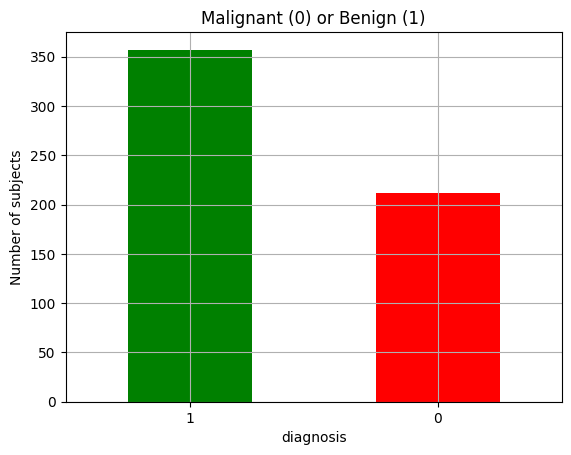

In [61]:
barp = df['diagnosis'].value_counts().plot.bar(
    grid=True,
    rot=0,
    title='Malignant (0) or Benign (1)',
    color=['g','r'],
    ylabel='Number of subjects'
)

<div dir=rtl>
    קיבלנו חוסר איזון בין המחלקות השונות בדאטא. זה עלול להיות משמעותי בהתאם למודל שלנו.
    <br />
    נחקור את הפיצ'רים כעת. 
</div>

In [62]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<div dir=rtl>
    לצורך נוחות הצפייה נהפוך את הטבלה - נגרום לאינדקס להפוך לעמודות - ואת זה עושים על ידי פעולת הטרנספוז.
</div>

In [63]:
df.describe().T[['count','mean','std','min','max']]

,count,mean,std,min,max
mean radius,569.0,14.127292,3.524049,6.981000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.09744


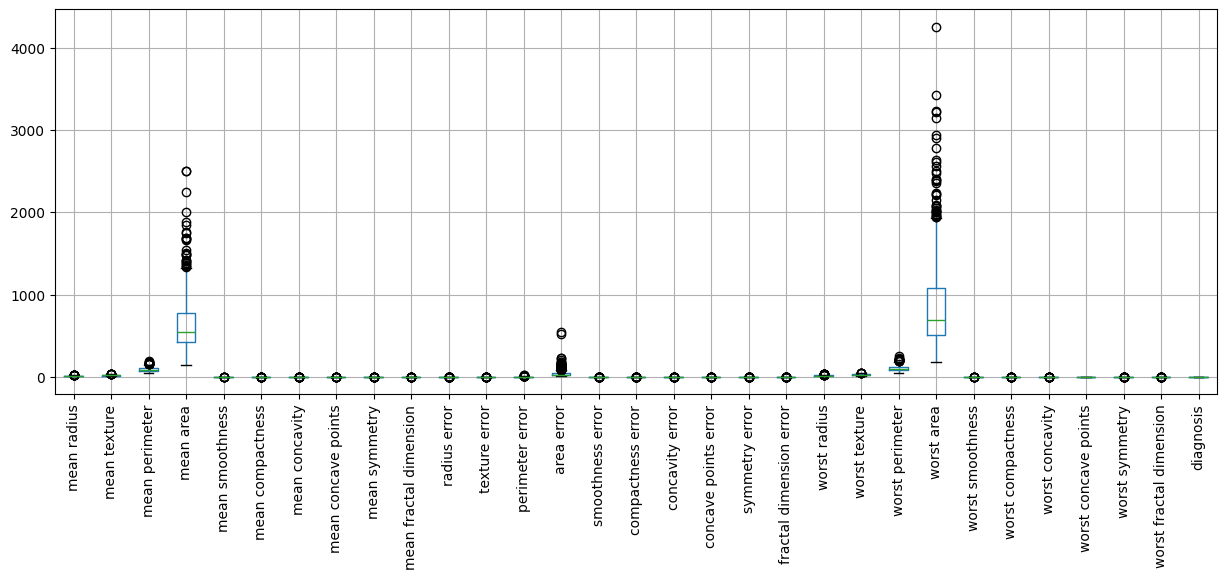

In [64]:
bplot = df.boxplot(
    figsize=(15, 5),
    rot=90
)

IQR:

https://en.wikipedia.org/wiki/Interquartile_range

Box plot:

https://en.wikipedia.org/wiki/Box_plot


<div dir=rtl>
    ננרמל כל עמודה נומרית (את עמודת האבחנה הבוליאנית נשים בצד) על ידי החסרת הממוצע ממנה וחלוקה בסטיית תקן שלה. למזלינו פנדס מאפשר לבצע זאת באופן קסום בשורה אחת פשוטה בזכות רדוקציה וברודקסטינג על המימד האחרון כברירת מחדל
</div>

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
536,0.040496,0.758039,0.074117,-0.071293,0.528985,0.209400,0.721285,0.321390,0.417233,-0.421736,...,1.398050,-0.088125,-0.267465,0.246641,0.120982,0.724803,0.328511,-0.327726,-0.024130,0
276,-0.793772,-1.192654,-0.830448,-0.733955,-0.182754,-1.242521,-1.095240,-1.174815,0.519369,-0.649770,...,-1.088015,-0.889552,-0.742211,-0.283307,-1.149034,-1.280932,-1.574510,-0.230744,-1.112093,1
405,-0.904440,-0.162670,-0.888063,-0.809542,0.287236,-0.563140,-0.493721,-0.505096,-1.187770,0.474818,...,-0.015818,-0.729148,-0.716919,0.172185,-0.571165,-0.627868,-0.543663,-1.050238,-0.366852,1


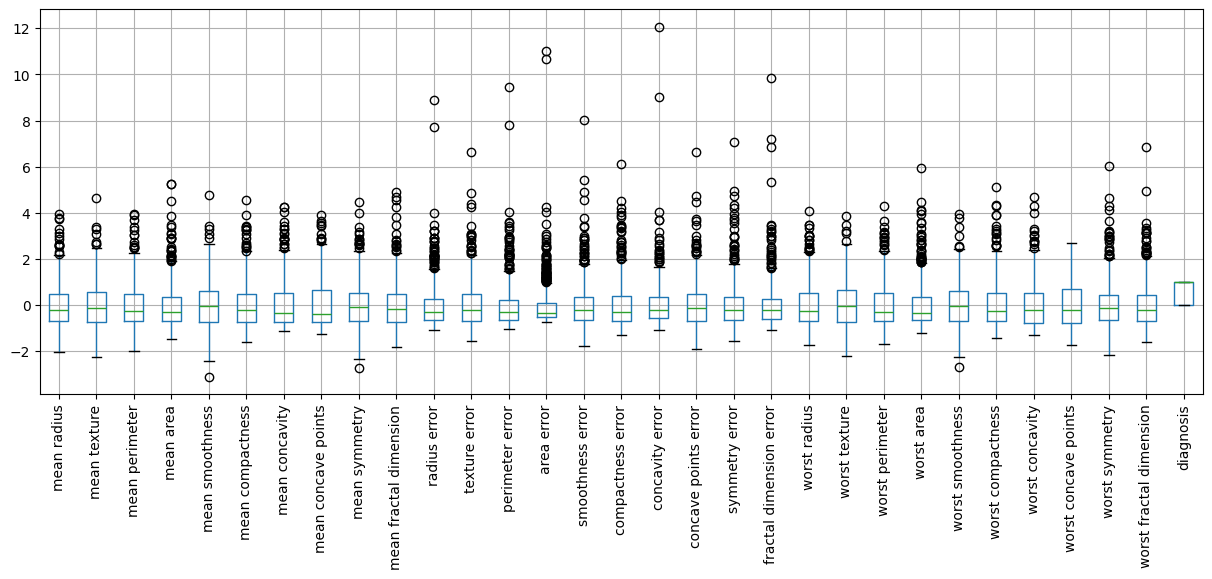

In [65]:
df_diagnosis = df['diagnosis']
# TODO analyze how it works (reduction, broadcasting)
df = (df - df.mean()) / (df.std() + 1e-10)

df['diagnosis'] = df_diagnosis
display(df.sample(3))
bplot = df.boxplot(
    figsize=(15, 5),
    rot=90
)
df_normed = copy.copy(df)


<div dir=rtl>
הבוקספלוט פחות מכוער אבל האם מוסיף מידע? עשוי לסמן פיצ"רים מנוונים (חסרי כל פיזור למשל) אבל אלה שמפולגים סביר (כמו כולם פה) נראים כולם אותו דבר
</div>


<div dir=rtl>
    לבסוף נחקור את היחסים בין הפיצ'רים.
    <br />
    קיימות הרבה מאוד שיטות בחירת פיצ'רים. בתרגול הזה נלמד אחת מהן - אפיון פיצ'רים על ידי קורלציה.
    <br />
    למזלינו פנדס מאפשרת בידקת הקורלציה בין כל זוג פיצ'רים בטבלה על ידי מתודה אחת:
</div>

<a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html'>DataFrame.corr
</a>
<div dir=rtl>
    <br />
    ברירת המחדל של הפונקציה היא מציאת הקורלציה על פי פירסון. 
    <br />
    זוג פיצ'רים יכול להיות קורלטיבי במיוחד - כמו למשל שטח ורדיוס באובייקט כדורי כמו גידול - ואז אחד מהם לא מוסיף מידע.
</div>

In [14]:
feat_corr_mtx = df.corr()
feat_corr_mtx.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560


<div dir=rtl>
    matshow - מציג מטריצה בצורה טבלאית ("פיקסלים")

</div>

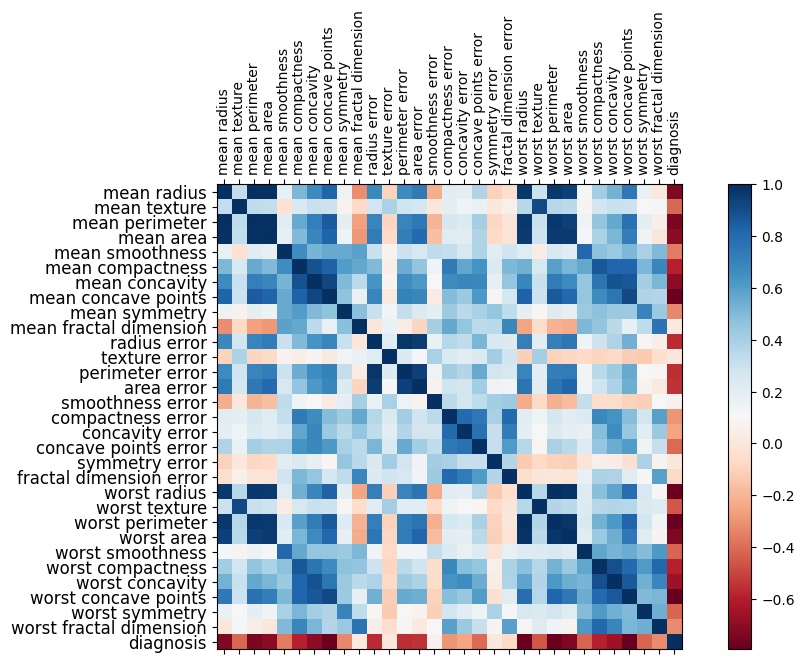

In [16]:
fig = plt.figure(figsize=(12, 6))
corp = plt.matshow(feat_corr_mtx, fignum=fig.number, cmap='RdBu')

plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=12)
cb = plt.colorbar()

<div dir=rtl>
    המידע שלנו חי במרחב בעל 30 מימדים - עודף מימדי
    <br/>
    נבחן את המטריצה מעל ונבין שהרבה פיצ'רים לא מוסיפים מידע - הם קורלטיביים אחד עם השני.
    <br/>
    לצורך ויזואליזצייה ובחירה חצי-ידנית של פיצ"רים מייצגים, נקבץ שורות (ועמודות) דומות של מטריצת האוטוקורלציה - 
    <br/>
    דוגמא קטנה וראשונית של אלגוריתם קלאסטרינג
</div>

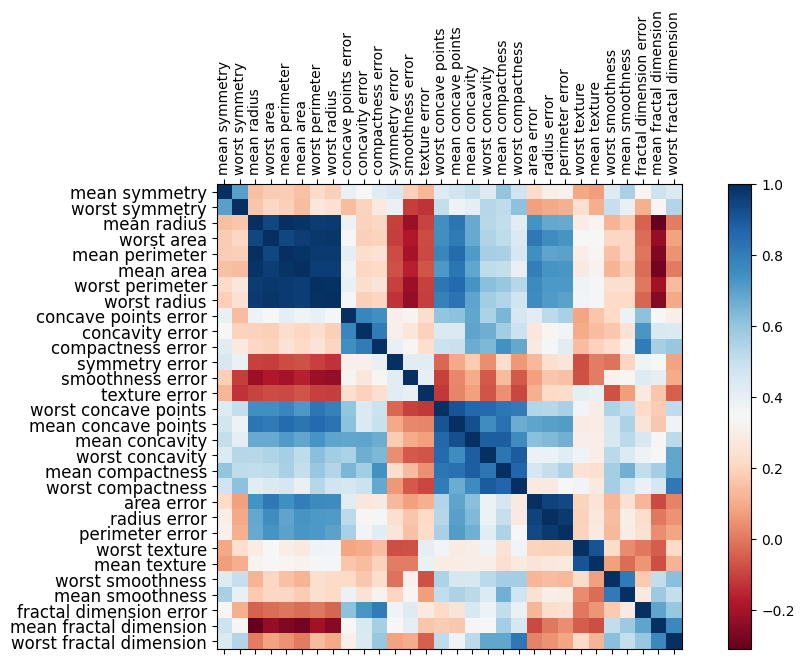

In [17]:
from sklearn.cluster import KMeans
kmeans_model_3d = KMeans(n_clusters = 8)
feat_corr_mtx_nodiag = feat_corr_mtx.drop('diagnosis', axis=0).drop('diagnosis', axis=1)
res = kmeans_model_3d.fit(feat_corr_mtx_nodiag)
# ! res.labels_ gives cluster IDs for each vector (feature)
grouping_indices = res.labels_.argsort() 
ft_corr_sorted = feat_corr_mtx.iloc[grouping_indices]
ft_corr_sorted = ft_corr_sorted.T.iloc[grouping_indices]
fig = plt.figure(figsize=(12, 6))
corp = plt.matshow(ft_corr_sorted, fignum=fig.number, cmap='RdBu')
plt.xticks(range(ft_corr_sorted.shape[1]), ft_corr_sorted.columns, fontsize=10, rotation=90)
plt.yticks(range(ft_corr_sorted.shape[1]), ft_corr_sorted.columns, fontsize=12)
cb = plt.colorbar()

<div dir=rtl>
    ג. קבצו את הנבדקים על ידי שימוש באלגוריתם קלאסתרינג. האם ניתן לסווג את הנבדקים לפי אלגוריתם הקיבוץ? 
    <br />
    מה תהיה השגיאה אם ננסה?
    <br />
    <br />
     - נבחר כמה פיצ"רים בודדים איתם נעבוד. איך נבחר? כך שיכילו את רוב המידע ויהיו כמה שפחות קורלטיביים אחד עם השני.
     למשל, נציג מכל מקבץ\בלוק במטריצת קורלציה
</div>

In [18]:
selected_columns = ['mean smoothness', 'mean radius','mean symmetry']

<div dir=rtl>
. קשה לצייר הרבה מימדים (3 ומעלה) . נצייר פיזור בכל ההטלות הדו-מימדיות

למרות שאנחנו לכאורה עדיין בשלב הקיבוץ והורדת מימדים, נפזול גם למטרה הסופית ונציג את האבחנה עם צבע
</div>

goo


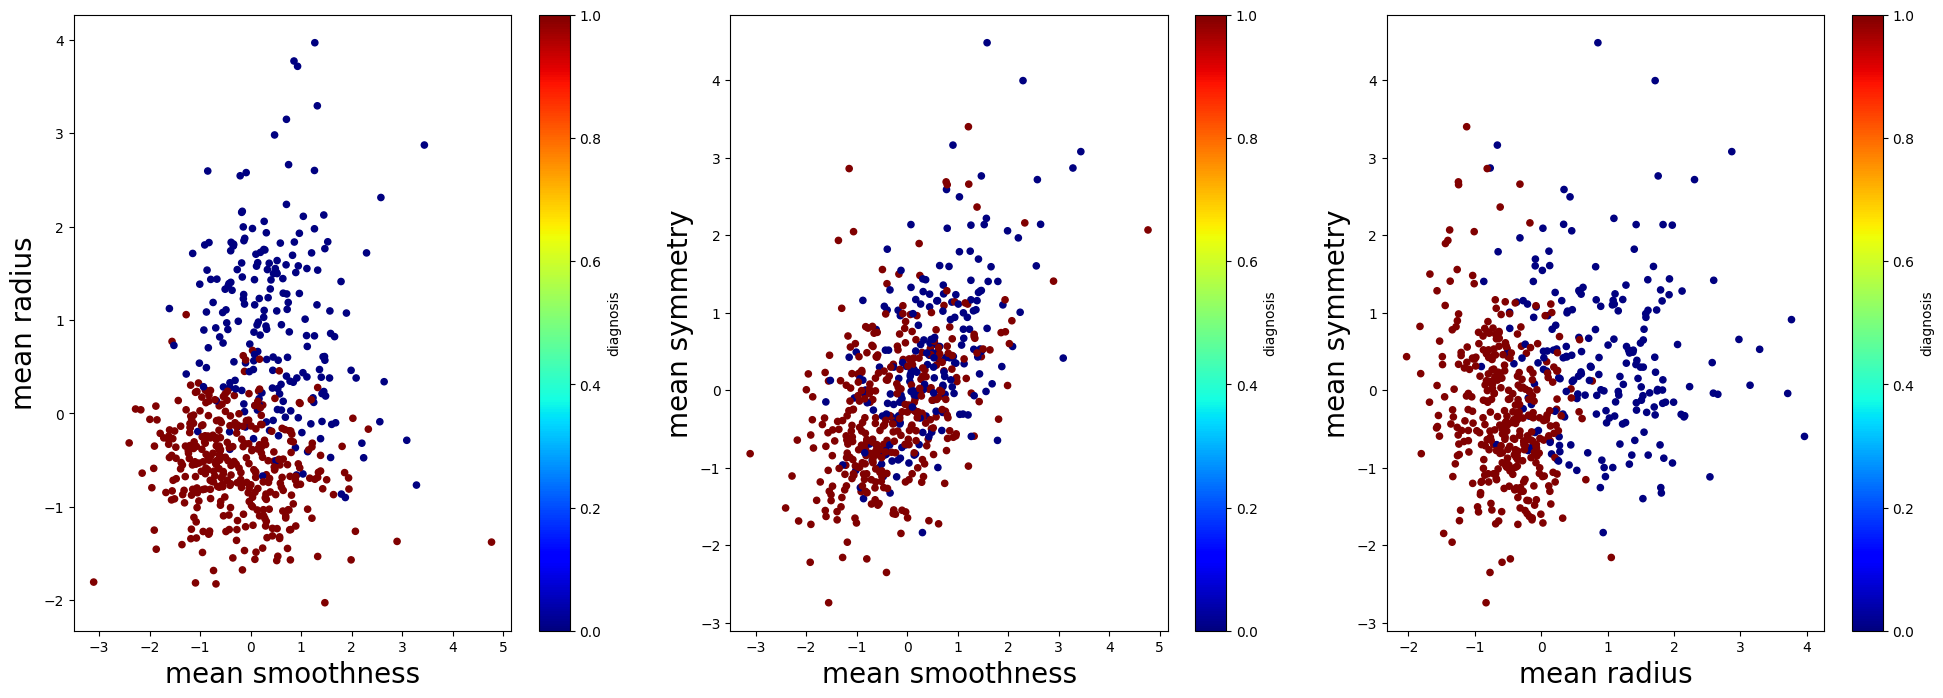

In [ ]:
import TA8.TA8_utils as utils4
from importlib import reload
reload(utils4) 

utils4.output_multi_scatter(df, selected_columns)

<div dir=rtl>
    נתחיל לקבץ. נשתמש באלגוריתם KMeans.
    יתרונות: פשוט וקל להבנה וכך גם המשמעות של המקבצים; מתכנס בוודאות; הוספת דגימות חדשות היא פשוטה, גם בשלב האימון וגם בשלב ההסקה. חסרונות: מניח הנחות מסוימות ובראשן - שהמקבצים רדיאליים; רגיש לתנאי ההתחלה; מושפע על ידי אוטליארים; מספר המקבצים הסופי הוא פרמטר הנקבע מראש.
</div>

In [20]:
from sklearn.cluster import KMeans
kmeans_model_3d = KMeans(n_clusters = 2)

<div dir=rtl>
    איטרציות KMEANS על רגל אחת:
    <br/>
      (א) לכל נקודה מוצאים את הסנטרואיד (מרכז קלאסטר) הקרוב אליה ומשייכים את הנקודה למרכז.
      <br/> (ב) לכל הנקודות השייכות לאותו הסנטרואיד מחשבים מרכז מסה (ממוצע בכל רכיב של הוקטור), כך מעדכנים את מיקום הסנטרואיד. חוזרים על (א), (ב)) לסירוגין עד להתכנסות.
</div>

In [21]:
# Run the algorithm!
kmeans_model_3d.fit(df.loc[:,selected_columns])
# Present results: (a) cluster centers (b) cluster affiliation of each datapoint
kmeans_model_3d.cluster_centers_, kmeans_model_3d.labels_[20:30]

(array([[-0.54032031, -0.39703679, -0.50589061],
        [ 0.8022223 ,  0.58948694,  0.75110397]]),
 array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1]))

<div dir=rtl>
    קיבלנו שני מקבצים ובהתאם ווקטור מספרי עם שני ערכים - 0 המקבץ הראשון 1- המקבץ השני.
    <br />
    נשים לב שאין משמעות למספרים עצמם בווקטור. למקבץ אין "שם". 
    <br />
    בהרצה אחרת היינו עלולים לקבל היפוך של המספרים (איפה שמופיע 1 יהיה אפס ולהפך) והקיבוץ עדיין היה נכון.
    <br />
    עכשיו נבדוק האם הקיבוץ ("למידה בלתי-מונחית") נותנת לנו בחינם גם פיתרון לסיווג ("למידה מונחית")
</div>

In [22]:
df['kmeans 3d output'] = kmeans_model_3d.labels_
df.sample(10)[['diagnosis', 'kmeans 3d output']]

,diagnosis,kmeans 3d output
489,0,0
314,1,1
245,1,0
473,1,0
142,1,0
298,1,0
116,1,0
249,1,0
491,1,0
527,1,0


In [23]:
#df['kmeans 3d output']=df['kmeans 3d output'].map({1:0, 0:1})
# TODO how to remove the 0/1 ambiguity, and make "cluster 1" the one more correlated with diagnosis?

CM = pd.DataFrame(
    df.groupby(['diagnosis','kmeans 3d output']).size(),
    columns = [' ']
)
CM

diagnosis kmeans 3d output     
0         0                  46
          1                 166
1         0                 295
          1                  62

<div dir=rtl>
    כאן קיבלנו טבלת תדירויות contingency table עם שני אינדקסים.
    <br />
    , כדי לגוון יחסית לתרגול הקודם, נפרמט את הטבלה קצת אחרת, נעביר אינדקס לעמודה
     מתודה ה היא unstack.
    <br />
    מתודה המעבירה עמודה לאינדקס - stack.
     <br />
     מתודות חופפות ששווה להכיר הן pivot, unpivot
</div>

In [24]:
CM = CM.unstack(level=-1)
CM

kmeans 3d output    0    1
diagnosis                 
0                  46  166
1                 295   62

In [25]:
CM_percent = (CM / CM.sum(axis='index') * 100).round(2)
CM_percent

kmeans 3d output      0      1
diagnosis                     
0                 13.49  72.81
1                 86.51  27.19

In [26]:
accuracy=np.sum([CM.iloc[i,i] for i in range(len(CM))])/np.sum(np.sum(CM))
print(f"accuracy = {accuracy:.2f}")

accuracy = 0.19


c:\Users\alexf\Documents\teaching\DS2023\tutorials\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


#### PCA - dimension reduction by feature *transformation* instead of *selection*

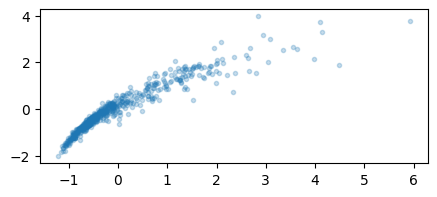

In [27]:
plt.figure(figsize=(5, 2))
plt.plot(df['worst area'], df['mean radius'], '.', alpha=0.25)
# TODO marginal hist

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
featn = ['worst perimeter', 'mean radius']
pca_res = pca.fit(df[featn])

vec0 = pca_res.components_[0] * np.sqrt(pca_res.explained_variance_[0])
vec1 = pca_res.components_[1] * np.sqrt(pca_res.explained_variance_[1])
df_trans = pca_res.transform(df[featn])

<div dir=rtl>
    הקומפוננטות הן הווקטורים העצמיים של מטריצת השונות המשותפת של כל הפיצ'רים (אחרי נרמול לווקטורי יחידה). הערך העצמי המתאים לכל ווקטור עצמי מייצג את "תרומת" הווקטור העצמי למטריצת השונות. נפלטים מסודרים לפי הערך העצמי - התרומה לשונות בדאטא   <br />

<div/>

[None, Text(0.5, 0, 'PC1'), Text(0, 0.5, 'PC2')]

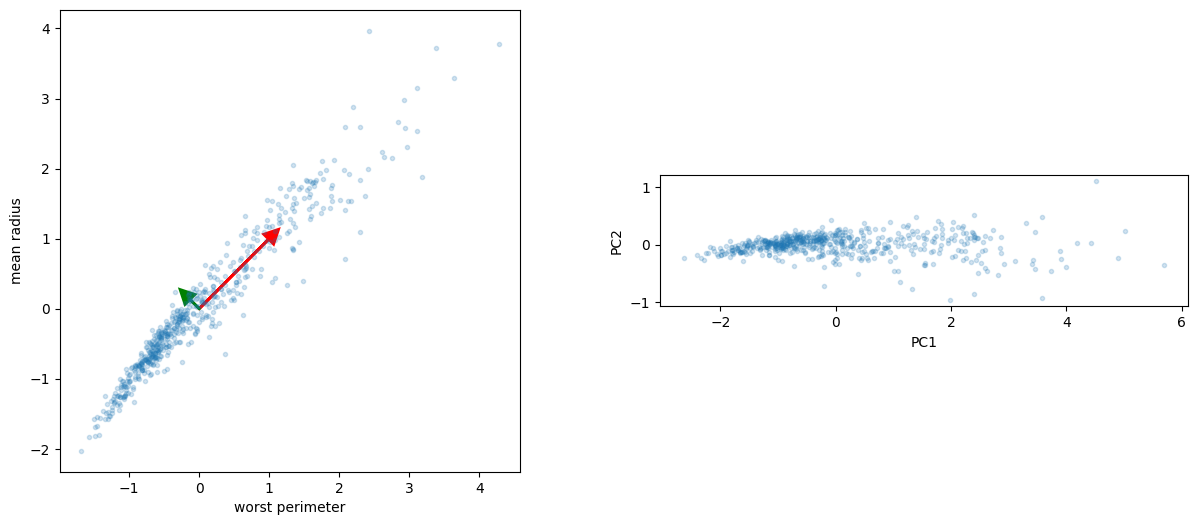

In [84]:
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plt.plot(df[featn[0]], df[featn[1]], '.', alpha=0.2)
plt.gca().set(aspect='equal', xlabel=featn[0], ylabel=featn[1])
plt.arrow(0, 0, vec0[0], vec0[1], color='r', linewidth=2, head_width=.2, head_length=.2)
plt.arrow(0, 0, vec1[0], vec1[1], color='g', linewidth=2, head_width=.2, head_length=.2)
plt.subplot(1,2,2)
plt.scatter(df_trans[:,0], df_trans[:,1], alpha=0.2, marker='.')
plt.gca().set(aspect='equal', xlabel='PC1', ylabel='PC2')

<div dir=rtl>
עכשיו שהבנו את הפעולה , ננסה להפעיל הורדת מימד בשיטת PCA 
על כל המידע
<div />

In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
df_normed_notarget = df_normed.drop(['diagnosis'], axis='columns')
pca_res = pca.fit(df_normed_notarget)
df_trans = pca_res.transform(df_normed_notarget)

In [87]:
df = copy.copy(df_normed)
df[['PC1', 'PC2', 'PC3']] = df_trans[:, :3]
#utils4.output_multi_scatter(df, ['PC1', 'PC2', 'PC3'])
# TODO try 3D plot

<div dir=rtl>
    נחזור על פעולת הקיבוץ כעת:
</div>

In [88]:
kmeans_model_2d = KMeans(n_clusters = 2)
kmeans_model_2d.fit(df.loc[:,['PC1', 'PC2', 'PC3']])
# kmeans_model_2d.fit(df_trans[:, :6])

df['kmeans 2d output'] = kmeans_model_2d.labels_
#df['kmeans 2d output']=df['kmeans 2d output'].map({1:0, 0:1})
CM = pd.DataFrame(
    df.groupby(['diagnosis','kmeans 2d output']).size(),
    columns = [' ']
).unstack(level=-1)
display(CM)
CM_percent = (CM / CM.sum(axis='index') * 100).round(2)
display(CM_percent)  # TODO %
accuracy=np.sum([CM.iloc[i,i] for i in range(len(CM))])/np.sum(np.sum(CM))
print(f"accuracy = {accuracy:.2f}")

kmeans 2d output    0    1
diagnosis                 
0                 175   37
1                  14  343

kmeans 2d output      0      1
diagnosis                     
0                 92.59   9.74
1                  7.41  90.26

accuracy = 0.91


c:\Users\alexf\Documents\teaching\DS2023\tutorials\.venv\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


<div dir=rtl>
    יתרון משמעותי של הורדת מימדים לדו- או תלת-מימד הוא שניתן לשרטט אותו:
</div>

goo


<Figure size 800x400 with 0 Axes>

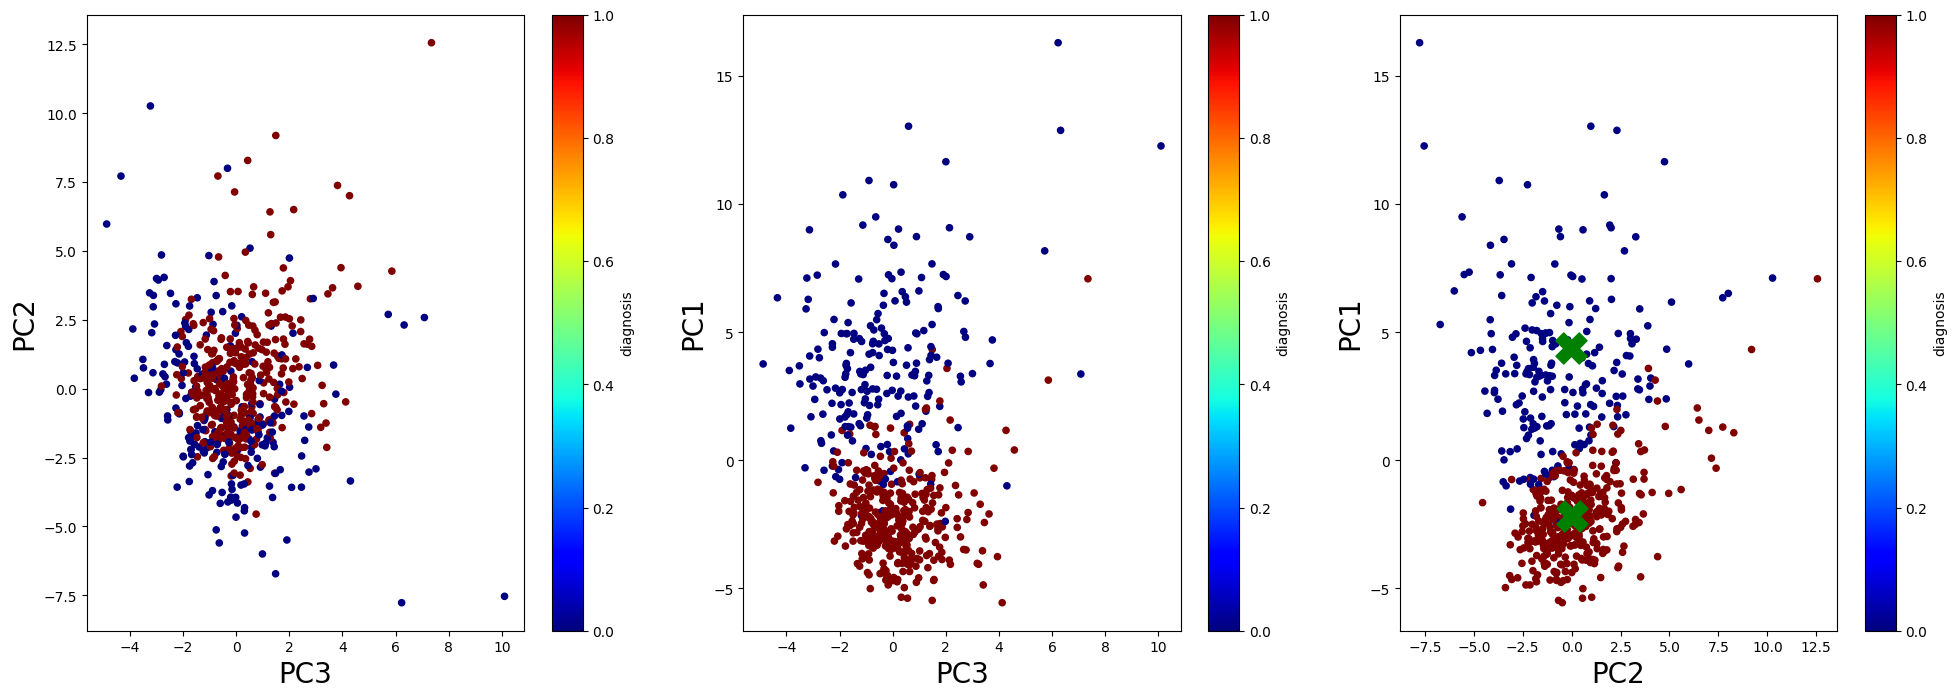

In [89]:
plt.figure(figsize=(8, 4))
utils4.output_multi_scatter(df, ['PC3', 'PC2', 'PC1'])

scatp = plt.scatter(
    kmeans_model_2d.cluster_centers_[:,1],
    kmeans_model_2d.cluster_centers_[:,0], 
    marker='X', color='g',
    s=500,
)

<div dir=rtl>
    לבסוף נבחין במשהו מעניין - כשאנחנו מבצעים PCA מוחזר לנו ווקטור שונות מוסברת.
    <br />
    זהערכים העצמיים של מטריצת הקווריאנס מנורמלים עם הטרייס (סכום כל הע"ע)
</div>

Explained variance can be represented as a function of ratio of related eigenvalue and sum of eigenvalues of all eigenvectors

C:\Users\alexf\AppData\Local\Temp\ipykernel_7736\2000132281.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), color='g')


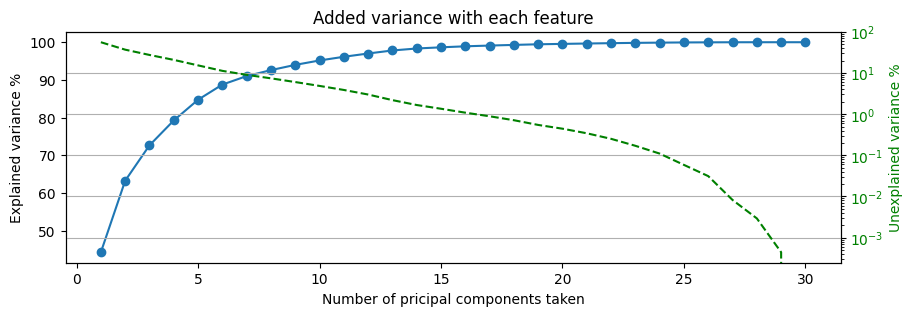

In [90]:
plt.figure(figsize=(10,3))
myrange = np.arange(len(pca_res.explained_variance_ratio_)) + 1
if False:
    plt.plot(myrange, pca_res.explained_variance_ratio_)
    plt.xlabel('index of pricipal component')
    plt.ylabel('Explained variance ratio (per-component)')
else:
    total_explained = np.cumsum(pca_res.explained_variance_ratio_)
    plt.plot(myrange, 100*total_explained, 'o-')
    plt.xlabel('Number of pricipal components taken')
    plt.ylabel('Explained variance %') # r sharex=plt.gca())
    ax = plt.gca().twinx()
    ax.semilogy(myrange, 100*(1 - total_explained), '--g')
    # ax.set_ylim(1e-4, 3)
    ax.set_yticklabels(ax.get_yticklabels(), color='g')
    ax.set_ylabel('Unexplained variance %', color='g')
    
# plt.xticks(np.arange(len(pca_all_features.explained_variance_ratio_)))
plt.grid(True)
# plt.ylim([0,0.5])

plt.title('Added variance with each feature')
plt.show()

<div dir=rtl>
    ניתן לראות למעלה כי 
    <b>עבור הדאטא הנוכחי בנרמול הנוכחי </b>
    ניתן להסביר כ45% מכלל השונות בדאטא על ידי הקומפוננטה הראשונה ועוד כ20% מהשונות על ידי הקומפוננטה השנייה. החל מאיזשהו שלב כל קומפוננטה נוספת מוסיפה יחסית מעט מידע נוסף, עד שבשלב כלשהו זה רעש בלבד ללא מידע. לכן PCA משמש רבות לאלגרויתמי denoising.
</div>